# Trabalho Interdisciplinar - Análise de Dados

## Integrantes:
- Murilo de Oliveira Moreira 2°G N°15
- Carlos Henrique de Godoy Santos 2°G N°1

## Base de Dados

### <h3> Explicação da Base de Dados:
Nossa base de dados foi criada a partir de um formulário (FORMS) e contém um total de 11 colunas, sendo 10 delas atributos e uma resposta. Abaixo está a descrição de cada uma das colunas:

<hr>

#### <h4><strong> Atributos </strong>

<strong> 1. Faixa etária: </strong> Qual é a sua faixa etária? <br>

<strong> 2. Renda familiar mensal: </strong>Qual é a sua renda familiar mensal, considerando as seguintes faixas: <br>

<strong> 3. Práticas sustentáveis: </strong>Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia? <br>

<strong> 4. Frequência das práticas sustentáveis: </strong> Com que frequência você pratica uma ação sustentável? <br>

<strong> 5. Aprendizado sobre sustentabilidade na escola: </strong> Você aprendeu ou teve aulas sobre sustentabilidade na escola? <br>

<strong> 6. Uso de jogos no aprendizado escolar: </strong> Se você aprendeu sustentabilidade na escola, incluíram jogos para a sua aprendizagem? <br>

<strong> 7. Opinião sobre jogos para aprendizado: </strong> Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade? <br>

<strong> 8. Consumo de outros aplicativos/plataformas: </strong> Você faz ou já fez o consumo de outros aplicativos/plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa)? <br>

<strong> 9. Importância do conhecimento em Sustentabilidade/ESG: </strong> Você acha que o conhecimento sobre Sustentabilidade/ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional? <br>

<strong> 10. Funcionalidades úteis em um aplicativo: </strong> Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação? <br>

<hr>

#### <h4><strong> Resposta </strong>

<strong> 11. Motivação da Pessoa: </strong> Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)

<hr>

### <h3> Explicação do nosso Tratamento da base

Para que a base de dados seja adequada à nossa análise, precisamos tratar os seguintes pontos:
- Nossa base de dados conterá valores nulos devido a perguntas condicionais no formulário, onde algumas pessoas podem não responder. Portanto, preencheremos esses valores nulos com 'Não' ou '0'.

- Uma das perguntas do nosso formulário é de múltipla escolha, o que significa que algumas linhas específicas da base podem ter mais de um valor. Para resolver isso, vamos dividir essa coluna em várias a partir da vírgula, de acordo com o número de respostas. Além disso, os valores nulos resultantes serão substituídos por 'Não' ou '0'.

- Em alguns casos, formulários como Google Forms ou similares adicionam colunas padrão que não são relevantes para a nossa análise. Essas colunas podem conter valores nulos ou dados que não agregam valor, podendo até comprometer a qualidade da análise. Portanto, é essencial identificar e excluir essas colunas para garantir que o conjunto de dados seja mais limpo e focado nas informações que realmente importam. Removendo essas colunas desnecessárias, podemos evitar ruídos e possíveis erros na análise, além de simplificar o processamento dos dados.

- Nosso objetivo é avaliar as pessoas classificadas como 'Estudantil'. Para isso, transformaremos as outras classes ('Pessoal', 'Em um ambiente Profissional', e 'Não tenho motivação') em uma única categoria chamada 'Não tenho motivação'

<hr>

### Importações necessárias para nossa Análise

In [1]:
# Importações para análise de dados
import pandas as pd
import numpy as np

# Imporatações para o PCA
from sklearn.decomposition import PCA

# Importações para o Pré-processamento
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# Importação para separar o treino e teste
from sklearn.model_selection import train_test_split

# Importação para aumentar nossa base de dados, duplicamento de dados
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Importações dos Modelos
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Importações para as Métricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importações para o Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Importações para plotarmos
import matplotlib.pyplot as plt
import seaborn as sns

# Importações para a Serialização
import pickle as pkl

# Importação para o Pipeline
from sklearn.pipeline import Pipeline

### Importando nossa base de dados

In [2]:
df = pd.read_excel("EducaEco 🪴(1-252).xlsx")
display(df.head(3))

,ID,Hora de início,Hora de conclusão,Email,Nome,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação.\n","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)"
0,1,2024-08-29 11:51:57,2024-08-29 11:53:14,anonymous,NaN,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,NaN,Sim,Não,Talvez,Não,Sim,Vídeos com profissionais falando sobre Sustent...,Não tenho motivação
1,2,2024-08-29 11:52:35,2024-08-29 11:54:31,anonymous,NaN,Menos de 18 anos,"Classe D: Entre R$ 1.321,00 e R$ 2.640,00.",Sim,Baixa,Sim,Não,Sim,Não,Sim,Atividades práticas para seu desenvolvimento;Q...,Pessoal
2,3,2024-08-29 11:53:34,2024-08-29 11:54:47,anonymous,NaN,Menos de 18 anos,"Classe D: Entre R$ 1.321,00 e R$ 2.640,00.",Sim,Alta,Sim,Sim,Talvez,Não,Não,Jogos para seu aprendizado;Atividades práticas...,Pessoal


### Tratando nossa base de dados

In [3]:
# df.info() para analisarmos nossa base de dados, e vermos os valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column                                                                                                                                                                                       Non-Null Count  Dtype         
---  ------                                                                                                                                                                                       --------------  -----         
 0   ID                                                                                                                                                                                           252 non-null    int64         
 1   Hora de início                                                                                                                                                                               252 non-null    datetime64

#### Exluindo as colunas que não serão utilizadas

In [4]:
# Criando uma lista das colunas que irão ser excluidas do df
colunas_excluir = ['ID', 'Hora de início', 'Hora de conclusão', 'Email', 'Nome']

# Retirando as colunas
df = df.drop(colunas_excluir, axis = 1)

# Mostrando
display(df.head(1))

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação.\n","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)"
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,NaN,Sim,Não,Talvez,Não,Sim,Vídeos com profissionais falando sobre Sustent...,Não tenho motivação


#### Quebrando a coluna 'Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação' na quantidade de respostas

In [5]:
# Limpando o nome da coluna e removendo possíveis espaços extras ao redor das respostas
coluna_interesse = 'Quais das seguintes funcionalidades você consideraria mais útil em um aplicativo de aprendizado sobre Sustentabilidade e ESG (Governança ambiental, social e corporativa) com gamificação.\n'

df[coluna_interesse] = df[coluna_interesse].str.strip()

# Criando novas colunas com base nas respostas possíveis
df['Jogos para seu aprendizado'] = df[coluna_interesse].apply(lambda x: 'Jogos para seu aprendizado' in x)
df['Atividades práticas para seu desenvolvimento'] = df[coluna_interesse].apply(lambda x: 'Atividades práticas para seu desenvolvimento' in x)
df['Quizzes para testar seu conhecimento'] = df[coluna_interesse].apply(lambda x: 'Quizzes para testar seu conhecimento' in x)
df['Vídeos com profissionais falando sobre Sustentabilidade e ESG'] = df[coluna_interesse].apply(lambda x: 'Vídeos com profissionais falando sobre Sustentabilidade e ESG' in x)

# Estamos utilizando o método .apply junto com o lambda x.
# o .apply aplica uma função a cada valor individual da coluna
# O lambda é uma função anônima. No código estamos usando ela para pegar o 'x' representar cada valor individual na coluna.
# Então quando eu indico uma resposta sendo o 'x' no lambda, ele está verificando se a resposta está no 'x', se estiver retorna True, se não retorna False.

# Excluindo a coluna original e mostrando as novas colunas
df = df.drop(columns=[coluna_interesse])

# Mostrando as novas colunas
display(df.head(1))

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,NaN,Sim,Não,Talvez,Não,Sim,Não tenho motivação,True,True,True,True


#### Preenchendo os valores nulos por 0

In [6]:
# Preenchendo os valores nulos por 0
# Passando em 0 em formato de string, porque se não dá conflito. O método fillna dá um conflito, não deixando a coluna uniformemente igual.
df.fillna('0', inplace = True)
display(df.head(1))

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?","Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,0,Sim,Não,Talvez,Não,Sim,Não tenho motivação,True,True,True,True


#### Transformando as classes ('Pessoal', 'Em um ambiente Profissional') na classe 'Não tenho motivação'

In [7]:
df['Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)'] = df['Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)'].apply(lambda x: 'Estudantil' if x == 'Estudantil' else 'Não tenho motivação')

#### Base tratada

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                --------------  ----- 
 0   Qual sua faixa etária ?                                                                                                                                               252 non-null    object
 1   Qual é a sua renda familiar mensal, considerando as seguintes faixas:                                                                                                 252 non-null    object
 2   Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgota

## Base de dados para os Modelos:

### Pré processamento

#### Separação Atributos e Resposta

In [9]:
# Atributos
atributos = df.drop('Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)', axis = 1)
display(atributos.head(1))

# Resposta
resposta = df['Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa)']
display(resposta)

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,Menos de 18 anos,"Classe C: Entre R$ 2.641,00 e R$ 7.920,00.",Não,0,Sim,Não,Talvez,Não,Sim,True,True,True,True


0      Não tenho motivação
1      Não tenho motivação
2      Não tenho motivação
3               Estudantil
4      Não tenho motivação
              ...         
247    Não tenho motivação
248    Não tenho motivação
249    Não tenho motivação
250             Estudantil
251    Não tenho motivação
Name: Qual seria sua motivação para usar um aplicativo de Sustentabilidade / ESG (Governança ambiental, social e corporativa), Length: 252, dtype: object

#### Criando preprocessadores

In [10]:
# Instanciando o labelEncoder - resposta
# Usando o labelEncoder para a resposta
label_encoder = LabelEncoder()

# Transformando os atributos de valores categóricos para valores numéricos
# Usando o ColumnTransformer() para transformar
# Usando o OrdinalEncoder() para ordenar as colunas

preprocessador = ColumnTransformer(transformers = [
    ('categoricas', OrdinalEncoder(), make_column_selector(dtype_include = ['object', 'bool'])),
    ],
    remainder = 'passthrough', # para preservar as colunas não transformadas no dataset, as colunas transformardas vão aparecer em primeiro no df
    verbose_feature_names_out = False # False para não colocar prefixo _categoricas nas colunas transformadas
)

#### Aplicando o pré-processador

In [11]:
# preprocessador para variáveis de resposta
resposta_pre = label_encoder.fit_transform(resposta) # resposta_pre variável sendo a coluna de resposta preprocessadas
display(resposta_pre)

# preprocessador atributos
atributos_pre = pd.DataFrame(preprocessador.fit_transform(atributos), columns = preprocessador.get_feature_names_out())
# display(atributos_pre.head(1))

# Nome das colunas na nova ordem - O columnsTransformer ordena de acordo com as novas transformações
colunas_novas = preprocessador.get_feature_names_out()
# print('Novas', colunas_novas)

# Capturando os nomes originais
colunas_originais = atributos.columns
# print("Originais: ", colunas_originais)

# Criando o dataFrame com a mesma ordem inicial de colunas
atributos_pre = atributos_pre[colunas_originais] # atributos_pre variáveis sendo a coluna de atributos preprocessadas.
display(atributos_pre.head(1))

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

,Qual sua faixa etária ?,"Qual é a sua renda familiar mensal, considerando as seguintes faixas:","Você adota alguma prática sustentável (ações que visam a utilização eficiente dos recursos naturais, sem os esgotar ou prejudicar os ecossistemas) no seu dia a dia?",Com que frequência você pratica uma ação sustentável ?,Você aprendeu ou teve aulas sobre sustentabilidade na escola?,"Se você aprendeu sustentabilidade na escola, inclui-a jogos para a sua aprendizagem?",Você acredita que jogos podem ajudar no aprendizado sobre sustentabilidade?\n,"Você faz ou já fez o consumo de outros aplicativos / plataformas de sustentabilidade e ESG (Governança ambiental, social e corporativa) ?","Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ?",Jogos para seu aprendizado,Atividades práticas para seu desenvolvimento,Quizzes para testar seu conhecimento,Vídeos com profissionais falando sobre Sustentabilidade e ESG
0,5.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0


#### Plotando Matriz de Correlação

A matriz de correlação é uma ferramenta estatística que ajuda a entender como variáveis numéricas se relacionam entre si em um conjunto de dados. O valor em cada célula indica o grau de correlação entre o par de variáveis que se cruzam naquela posição. <br>

<strong> Correlação positiva (+1):</strong> Indica que as duas variáveis aumentam ou diminuem juntas. <br>
<strong> Correlação negativa (-1):</strong> Indica que uma variável aumenta enquanto a outra diminui. <br>
<strong> Correlação próxima de zero (0):</strong> Indica pouca ou nenhuma relação linear entre as variáveis. Elas podem variar independentemente.

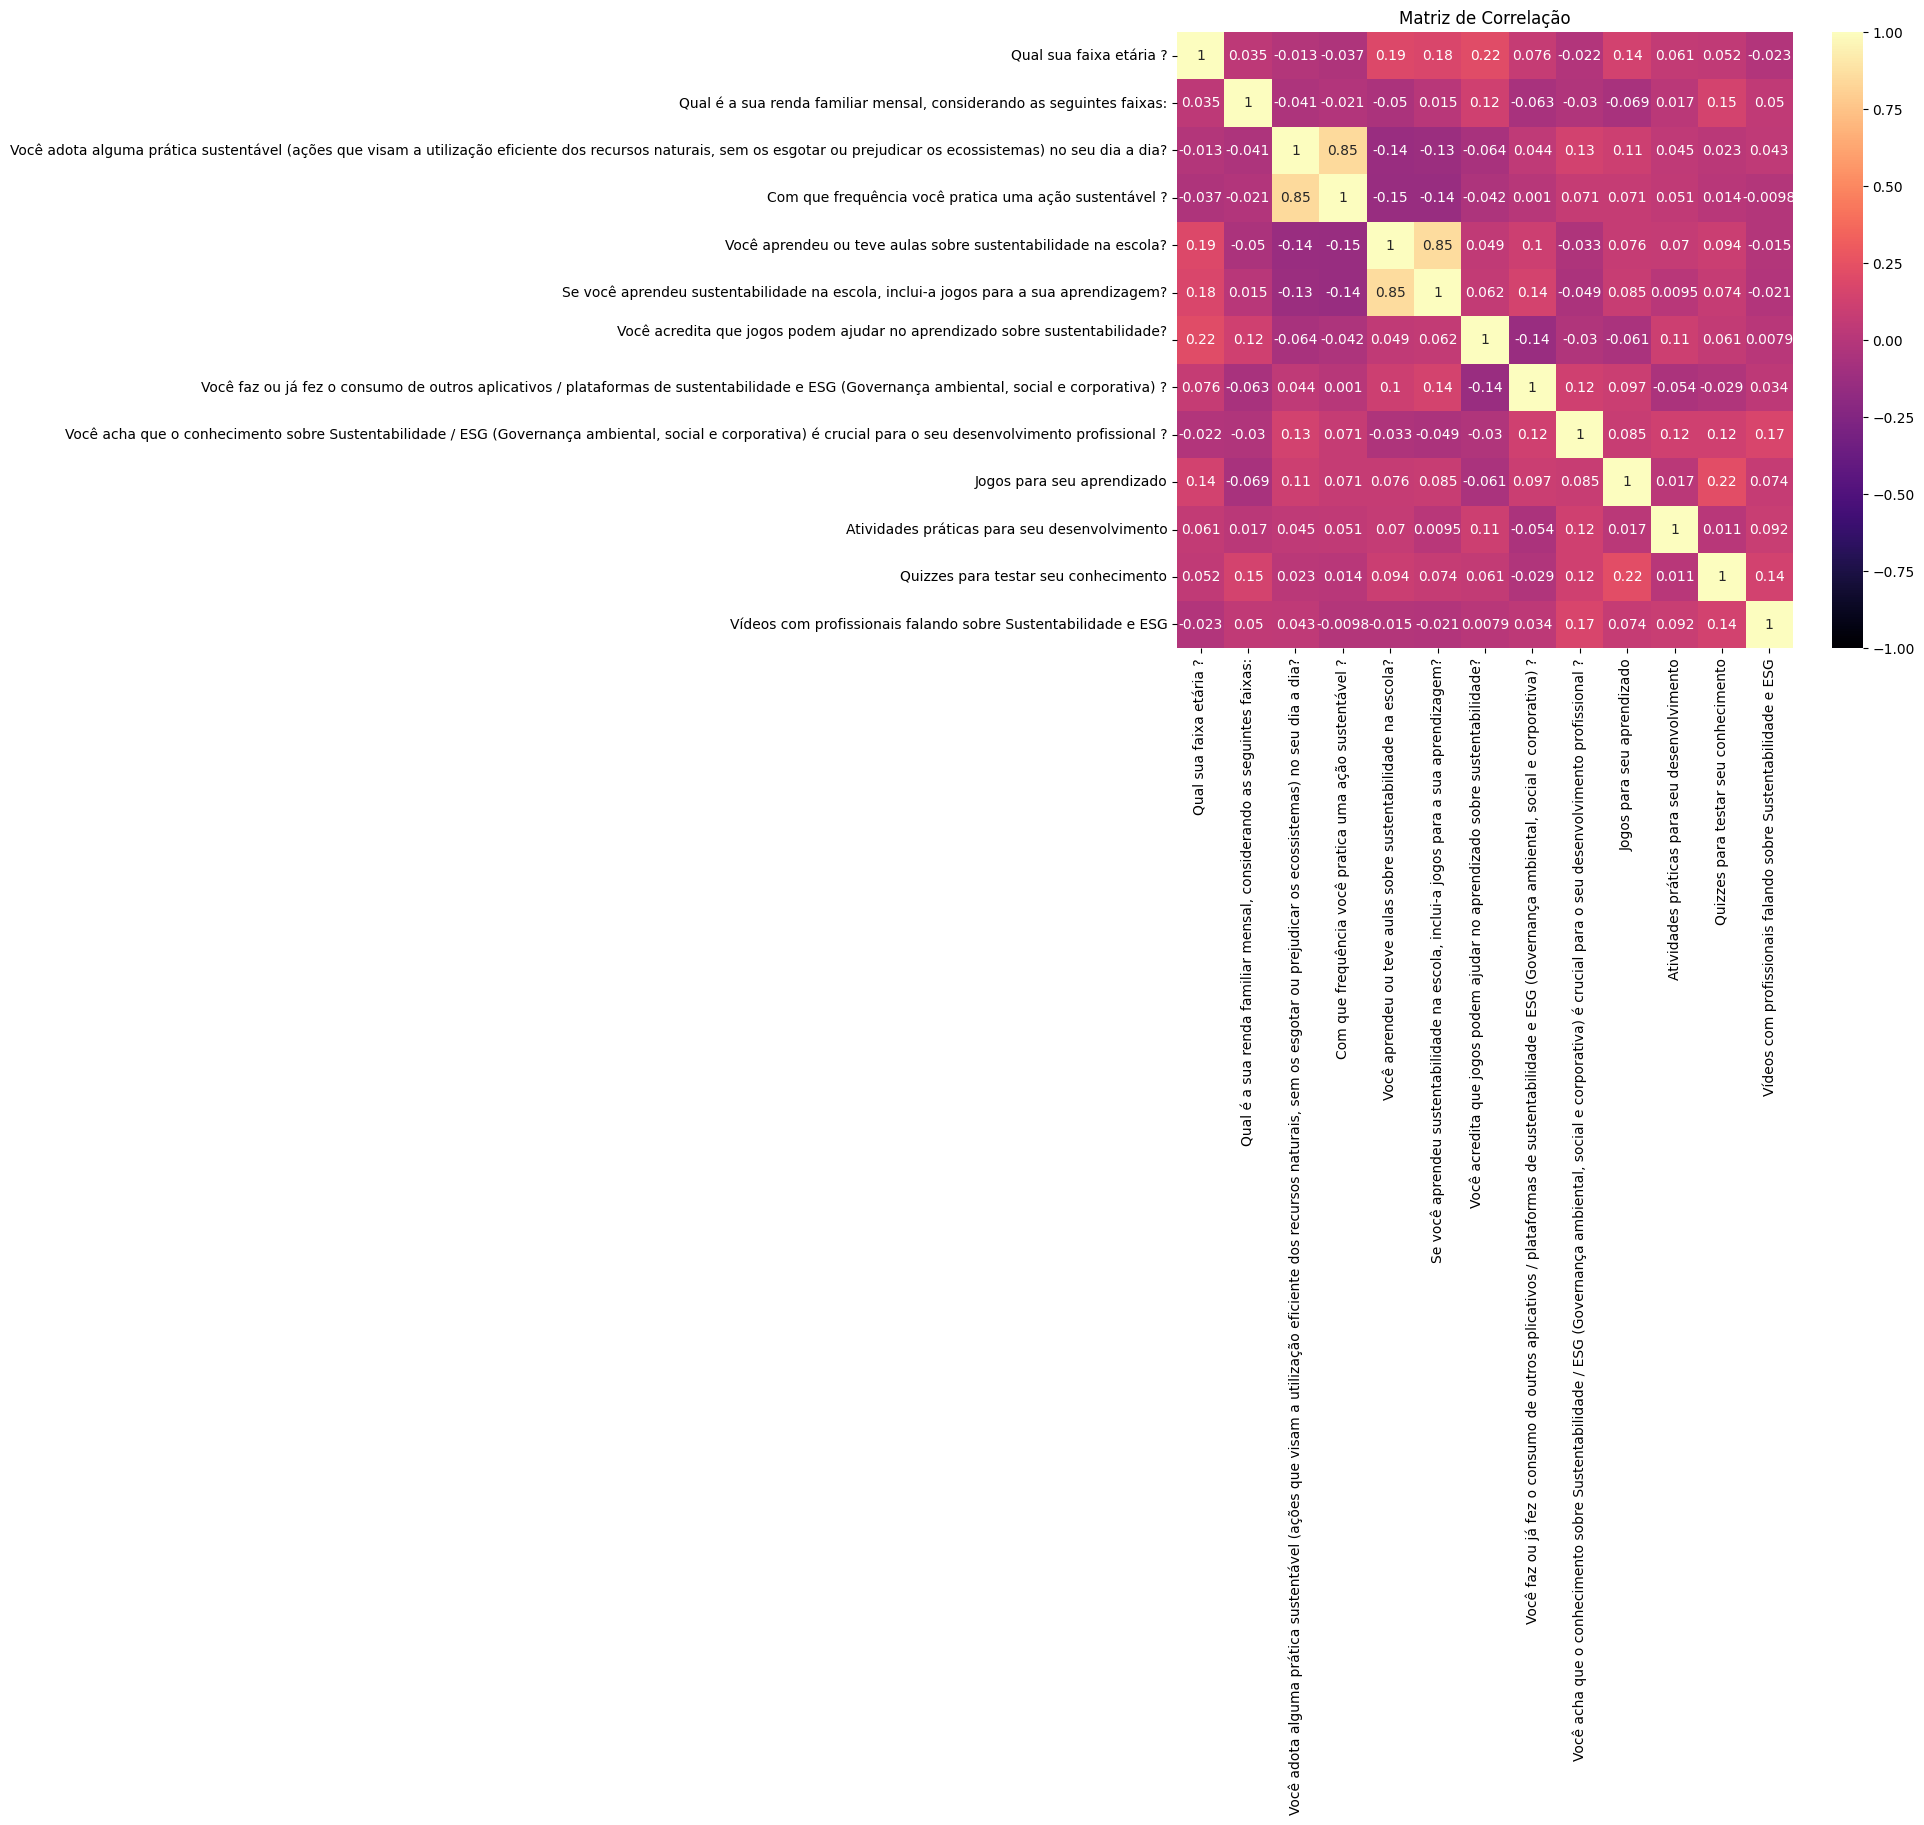

In [12]:
# Calculando a matriz de correlação para os atributos
matriz_correlacao = atributos_pre.corr()

# Definindo o tamanho do gráfico
plt.figure(figsize = (10, 8))

# Criando heatmap
sns.heatmap(matriz_correlacao, annot = True, cmap = 'magma', vmin = -1, vmax = 1, square = True)
plt.title("Matriz de Correlação")
plt.show()


### PCA

#### Explicação do uso do PCA

O PCA é uma técnica estatística de redução de dimensionalidade. Aplicando o PCA nos quatro modelos (Naive Bayes, Gini, Entropia e KNN), tivemos um desempenho ruim, diminuindo as acurácias.
Portanto não iremos usar o PCA, nesses Modelos.

#### Utilizando o PCA em busca de redução de dimensionalidade para aumentar a acurácia.

In [13]:
# pca = PCA(n_components = 0.95) # Preservando 95% da variância
# atributos_pre = pca.fit_transform(atributos_pre)

### Separando em Treino e Teste

##### Treino e teste

In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(atributos_pre, resposta_pre, test_size = 0.20, random_state = 42)

### Duplicando os Dados

- Para tentar melhorar o desempenho dos nossos modelos, vamos aumentar a nossa base de dados.

- O processo do Smote cria dados a partir dos registros do dataset igualmente. Ao colocar o k_neigbors = 5, ele vai ser basear nos 5 pontos mais próximos para criar um novo dado.

In [15]:
smote = SMOTE(k_neighbors = 5, random_state = 42)
X_treino_smote, y_treino_smote = smote.fit_resample(X_treino, y_treino)

## 🧠 Modelo NaiveBayes 🧠

### Treinando o Modelo

##### Criando o classificador

In [16]:
# Classificador GaussianNB
classificador_bayes = GaussianNB()

# Classificador GaussianNB com SMOTE
classificador_bayes_smote = GaussianNB()

# Treinando o Modelo
classificador_bayes.fit(X_treino, y_treino)

# Treinando o Modelo com o SMOTE
classificador_bayes_smote.fit(X_treino_smote, y_treino_smote)

GaussianNB()

##### Prevendo o Modelo - Com o conjunto de teste

In [17]:
# Prevendo o Modelo
previsoes_bayes = classificador_bayes.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_bayes_smote = classificador_bayes_smote.predict(X_teste)

### Mostrando as métricas - Antes do Cross Validation

In [18]:
nome_das_classes_bayes = [str(classe) for classe in label_encoder.classes_]

reporte_de_classificacao_bayes = classification_report(y_teste, previsoes_bayes, target_names = nome_das_classes_bayes)
print("Métricas Bayes: \n", reporte_de_classificacao_bayes)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_bayes_smote = classification_report(y_teste, previsoes_bayes_smote, target_names = nome_das_classes_bayes)
print("Métricas Bayes com SMOTE: \n", reporte_de_classificacao_bayes_smote)

Métricas Bayes: 
                      precision    recall  f1-score   support

         Estudantil       0.14      0.09      0.11        11
Não tenho motivação       0.77      0.85      0.81        40

           accuracy                           0.69        51
          macro avg       0.46      0.47      0.46        51
       weighted avg       0.64      0.69      0.66        51

-------------------------------------------------------------
Métricas Bayes com SMOTE: 
                      precision    recall  f1-score   support

         Estudantil       0.39      0.64      0.48        11
Não tenho motivação       0.88      0.72      0.79        40

           accuracy                           0.71        51
          macro avg       0.63      0.68      0.64        51
       weighted avg       0.77      0.71      0.73        51



##### Matriz de Confusão

Matriz de Confusão Bayes: 
[[ 1 10]
 [ 6 34]]


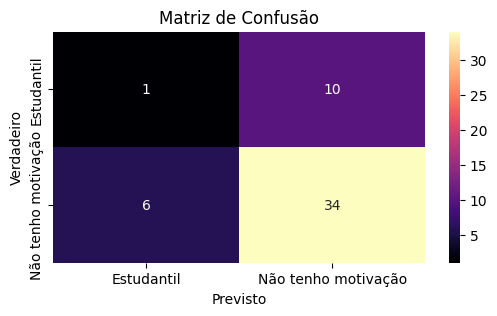

----------------------------------------------------------------
Matriz de Confusão Bayes com SMOTE: 
[[ 7  4]
 [11 29]]


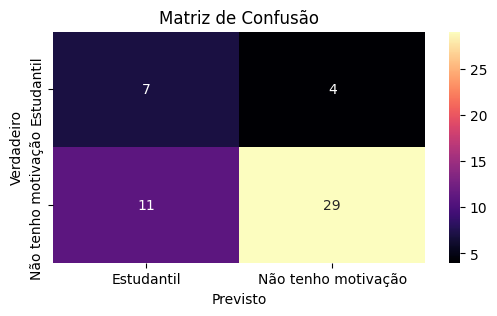

In [19]:
matriz_de_confusao_bayes = confusion_matrix(y_teste, previsoes_bayes)
print(f"Matriz de Confusão Bayes: \n{matriz_de_confusao_bayes}")


# Plotando a Matriz de Confusão
plt.figure(figsize = (6,3))
sns.heatmap(matriz_de_confusao_bayes, annot = True, fmt = 'd', cmap = 'magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()


print("----------------------------------------------------------------")

matriz_de_confusao_bayes_smote = confusion_matrix(y_teste, previsoes_bayes_smote)
print(f"Matriz de Confusão Bayes com SMOTE: \n{matriz_de_confusao_bayes_smote}")


# Plotando a Matriz de Confusão
plt.figure(figsize = (6,3))
sns.heatmap(matriz_de_confusao_bayes_smote, annot = True, fmt = 'd', cmap = 'magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

### Cross Validation

- #### Vamos dividir em 5 partes

In [20]:
# Criando classificador Cross Validation
classificador_bayes_cross_validation = GaussianNB()
# Parâmetros para o Cross Validation
parametros = {}

# Usando o GridSearchCV
bayes_cross_validation_grid = GridSearchCV(estimator = classificador_bayes_cross_validation, param_grid = parametros, scoring = "f1", cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo
bayes_cross_validation_grid.fit(X_treino_smote, y_treino_smote)

# Testando o Modelo
previsoes_bayes_cross_validation_grid = bayes_cross_validation_grid.predict(X_teste)

print("-"*100)

# Mostrando as melhor acurácia

bayes_resultados = bayes_cross_validation_grid.cv_results_
bayes_acuracias_cross_validation = bayes_resultados['mean_test_score']

bayes_melhor_acuracias = sorted(bayes_acuracias_cross_validation, reverse = True)[:5]
print("Melhores acurácias: ", bayes_melhor_acuracias)

bayes_acuracias_media = np.mean(bayes_melhor_acuracias)
print("Média das acurácias: ", bayes_acuracias_media)

print("-"*100)




----------------------------------------------------------------------------------------------------
Melhores acurácias:  [0.657440804422644]
Média das acurácias:  0.657440804422644
----------------------------------------------------------------------------------------------------


#### Métricas com o Cross Validation

In [21]:
reporte_de_classificacao_bayes_cross_validation = classification_report(y_teste, previsoes_bayes_cross_validation_grid, target_names = nome_das_classes_bayes)
print("Métricas Bayes: \n", reporte_de_classificacao_bayes_cross_validation)

Métricas Bayes: 
                      precision    recall  f1-score   support

         Estudantil       0.39      0.64      0.48        11
Não tenho motivação       0.88      0.72      0.79        40

           accuracy                           0.71        51
          macro avg       0.63      0.68      0.64        51
       weighted avg       0.77      0.71      0.73        51



#### Matriz de Confusão

Matriz de Confusão KNN:  
 [[ 7  4]
 [11 29]]


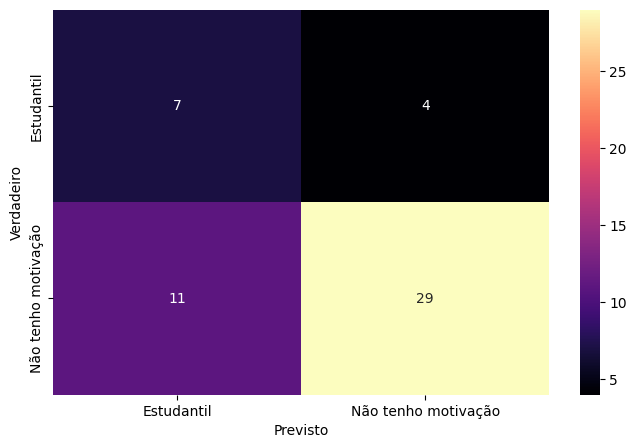

-------------------------------------------------------------------------------------------------------


In [22]:
# MATRIZ DE CONFUSÃO KNN
matriz_de_confusao_bayes_cross_validation = confusion_matrix(y_teste, previsoes_bayes_cross_validation_grid)
print("Matriz de Confusão KNN: ", "\n", matriz_de_confusao_bayes_cross_validation)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_bayes_cross_validation, annot=True, fmt='d', cmap='magma', xticklabels = nome_das_classes_bayes, yticklabels = nome_das_classes_bayes)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

### Conclusão Modelo Naive Bayes

##### Após a análise realizada com o Modelo Naive Bayes, utilizando tanto a base original quanto a balanceada, concluímos que o desempenho do modelo é superior sem o balanceamento pelo método SMOTE. Portanto, adotaremos a acurácia do modelo sem balanceamento como referência.

## 🎄 Modelo Árvore de Decisão - GINI 🎄

### Treinando o Modelo

#### Criando o classificador

In [23]:
# Criando classificador
classificador_gini = tree.DecisionTreeClassifier(criterion = 'gini')

# Criando classificador Smote
classificador_gini_smote = tree.DecisionTreeClassifier(criterion = 'gini')


# Treinando o modelo
classificador_gini.fit(X_treino, y_treino)

# Treinando o modelo SMOTE
classificador_gini_smote.fit(X_treino_smote, y_treino_smote)

DecisionTreeClassifier()

##### Prevendo o Modelo - Com o conjunto de teste

In [24]:
# Prevendo o Modelo
previsoes_gini = classificador_gini.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_gini_smote = classificador_gini_smote.predict(X_teste)

#### Mostrando os classificadores com a Árvore de Decisão

Árvore de Decisão GINI
Árvore de Decisão GINI SMOTE


[Text(0.3709677419354839, 0.9642857142857143, 'Qual sua faixa etária ? <= 4.152\ngini = 0.5\nsamples = 298\nvalue = [149, 149]'),
 Text(0.15725806451612903, 0.8928571428571429, 'Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ? <= 0.988\ngini = 0.382\nsamples = 105\nvalue = [27.0, 78.0]'),
 Text(0.08064516129032258, 0.8214285714285714, 'Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ? <= 0.109\ngini = 0.497\nsamples = 26\nvalue = [14, 12]'),
 Text(0.06451612903225806, 0.75, 'Qual é a sua renda familiar mensal, considerando as seguintes faixas: <= 2.5\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(0.03225806451612903, 0.6785714285714286, 'Qual sua faixa etária ? <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.016129032258064516, 0.6071428571428571, 'gini = 0.

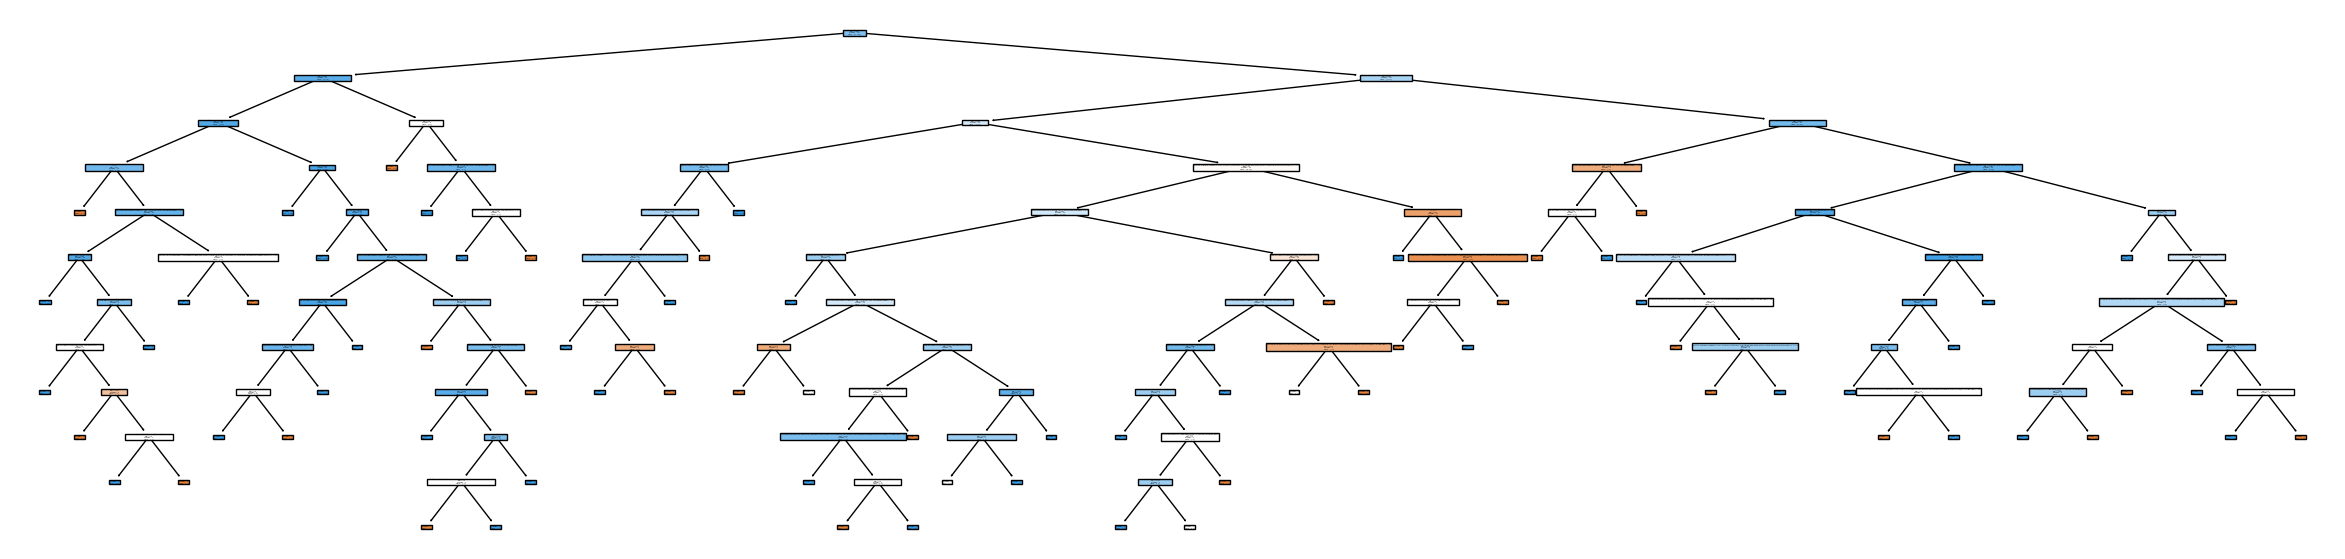

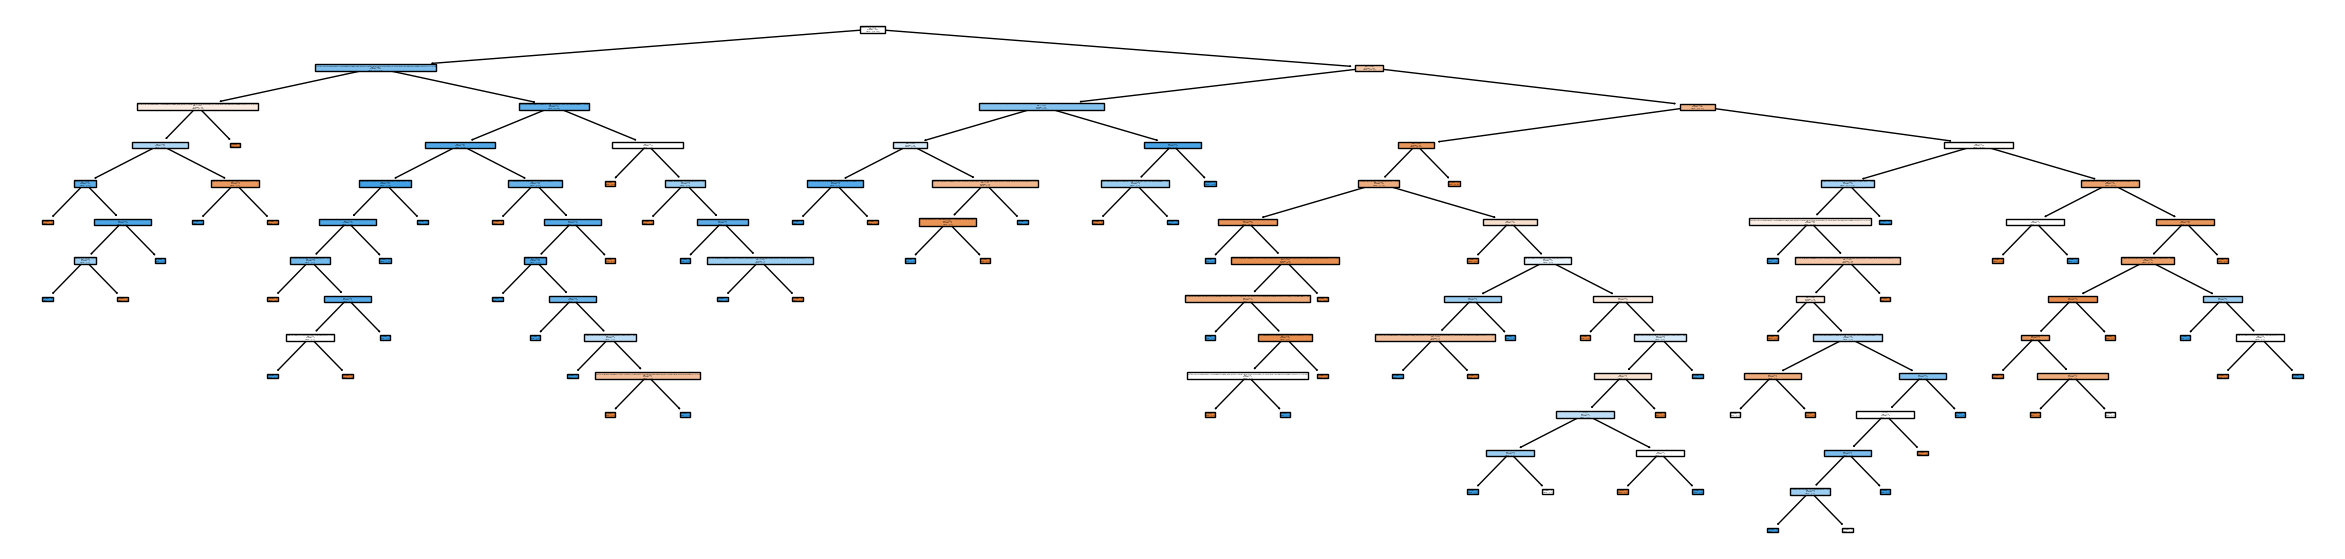

In [25]:
# Mostrando a Árvore GINI
plt.figure(figsize = (30, 7))
print("Árvore de Decisão GINI")
tree.plot_tree(classificador_gini, feature_names = atributos_pre.columns, filled = True)

# Mostrando a Árvore GINI SMOTE
plt.figure(figsize = (30, 7))
print("Árvore de Decisão GINI SMOTE")
tree.plot_tree(classificador_gini_smote, feature_names = atributos_pre.columns, filled = True)

### Mostrando as métricas - Antes do Cross Validation

In [26]:
# nome_das_classes_bayes = [str(classe) for classe in label_encoder.classes_]

reporte_de_classificacao_gini = classification_report(y_teste, previsoes_gini)
print("Métricas Árvore de Decisão - GINI: \n", reporte_de_classificacao_gini)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_gini_smote = classification_report(y_teste, previsoes_gini_smote)
print("Métricas Árvore de Decisão com SMOTE - GINI: \n", reporte_de_classificacao_gini_smote)

Métricas Árvore de Decisão - GINI: 
               precision    recall  f1-score   support

           0       0.38      0.55      0.44        11
           1       0.86      0.75      0.80        40

    accuracy                           0.71        51
   macro avg       0.62      0.65      0.62        51
weighted avg       0.75      0.71      0.72        51

-------------------------------------------------------------
Métricas Árvore de Decisão com SMOTE - GINI: 
               precision    recall  f1-score   support

           0       0.25      0.45      0.32        11
           1       0.81      0.62      0.70        40

    accuracy                           0.59        51
   macro avg       0.53      0.54      0.51        51
weighted avg       0.69      0.59      0.62        51



##### Matriz de Confusão

Matriz de Confusão GINI:  
 [[ 6  5]
 [10 30]]


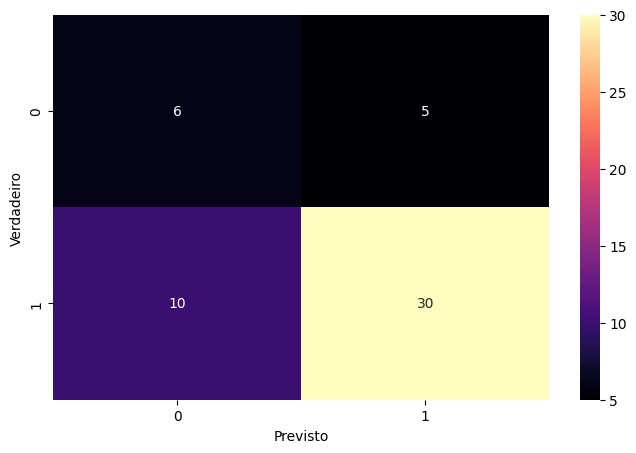

-------------------------------------------------------------------------------------------------------
Matriz de Confusão GINI SMOTE:  
 [[ 5  6]
 [15 25]]


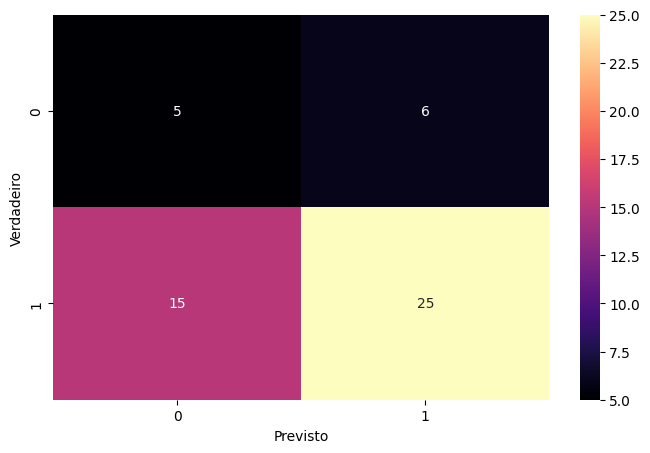

In [27]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_gini = confusion_matrix(y_teste, previsoes_gini)
print("Matriz de Confusão GINI: ", "\n", matriz_de_confusao_gini)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_gini, annot=True, fmt='d', cmap='magma', xticklabels = classificador_gini.classes_, yticklabels = classificador_gini.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

# MATRIZ DE CONFUSÃO GINI - SMOTE
matriz_de_confusao_gini_smote = confusion_matrix(y_teste, previsoes_gini_smote)
print("Matriz de Confusão GINI SMOTE: ", "\n", matriz_de_confusao_gini_smote)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_gini_smote, annot=True, fmt='d', cmap='magma', xticklabels = classificador_gini_smote.classes_, yticklabels = classificador_gini_smote.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### Cross Validation

- Separando em 5 partes

In [28]:
# Parâmetros
parametros_gini = {
    'criterion': ['gini'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}


# Criando classificador com os hyper parameters
classificador_gini_smote_cross_validation = tree.DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 4,
    max_features = 'sqrt',
    min_samples_leaf = 10,
    min_samples_split = 10,
    splitter = 'best',
    random_state=42
    )

# Criando objeto GridSearchCV, para o Cross Validation com os hyperparametros
gini_cross_validantion_grid = GridSearchCV(estimator = classificador_gini_smote_cross_validation, param_grid = parametros_gini, scoring = 'f1', cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo com o SMOTE
gini_cross_validantion_grid.fit(X_treino_smote, y_treino_smote)

# Testando o Modelo
previsoes_gini_cross_validation = gini_cross_validantion_grid.predict(X_teste)

print("-"*100)

# Mostrando os melhores hyperparameters
print("Melhores hyperparameters: ", gini_cross_validantion_grid.best_params_)

# Mostrando as melhor acurácia

gini_resultados_smote = gini_cross_validantion_grid.cv_results_
gini_smote_acuracias_cross_validation = gini_resultados_smote['mean_test_score']

gini_melhor_acuracias_smote = sorted(gini_smote_acuracias_cross_validation, reverse = True)[:5]
print("Melhores acurácias: ", gini_melhor_acuracias_smote)

gini_acuracias_media_smote = np.mean(gini_melhor_acuracias_smote)
print("Média das acurácias GINI: ", gini_acuracias_media_smote)

print("-"*100)


----------------------------------------------------------------------------------------------------
Melhores hyperparameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Melhores acurácias:  [0.7583735170302335, 0.7583735170302335, 0.7509557718681273, 0.7509557718681273, 0.74909726158303]
Média das acurácias GINI:  0.7535511678759503
----------------------------------------------------------------------------------------------------


#### Métricas - Cross Validation

In [29]:
# Métricas Bayes com SMOTE
reporte_de_classificacao_gini_cross_validation = classification_report(y_teste, previsoes_gini_cross_validation)
print("Métricas Gini com SMOTE: \n", reporte_de_classificacao_gini_cross_validation)

Métricas Gini com SMOTE: 
               precision    recall  f1-score   support

           0       0.25      0.45      0.32        11
           1       0.81      0.62      0.70        40

    accuracy                           0.59        51
   macro avg       0.53      0.54      0.51        51
weighted avg       0.69      0.59      0.62        51



#### Matriz de Confusão

Matriz de Confusão GINI:  
 [[ 5  6]
 [15 25]]


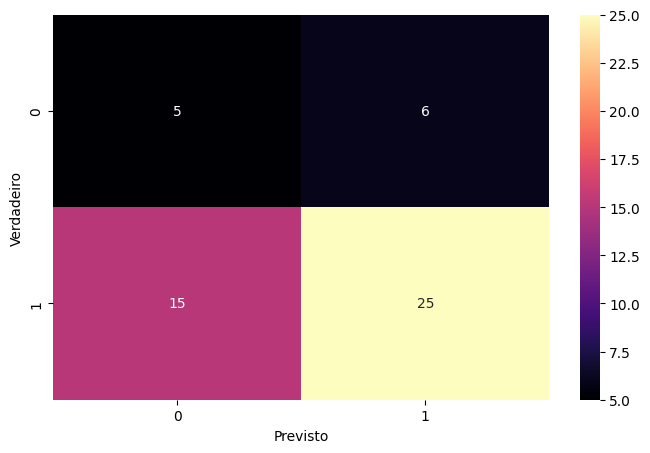

-------------------------------------------------------------------------------------------------------


In [30]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_gini_cross_validation = confusion_matrix(y_teste, previsoes_gini_cross_validation)
print("Matriz de Confusão GINI: ", "\n", matriz_de_confusao_gini_cross_validation)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_gini_cross_validation, annot=True, fmt='d', cmap='magma')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

### Conclusão Árvore de Decisão - GINI

##### Concluindo o Modelo Árvore de Decisão - GINI, podemos observar que usando o método SMOTE naturalmente a acurácia foi maior. Mas quando usamos ele dentro do Cross Validation tiver uma acurácia maior sem o método SMOTE. Usamos o GridSearchCV com os hyperparâmetros e obtivemos uma acurácia muito maior. Sendo assim, vamos usar a acurácia com os hyperparâmetros sem o método SMOTE.

## 🌳🌲 Modelo Árvore de Decisão - Entropia 🌲🌳

### Treinando o Modelo

#### Criando o classificador

In [31]:
# Criando classificador
classificador_entropy = tree.DecisionTreeClassifier(criterion = 'entropy')

# Criando classificador Smote
classificador_entropy_smote = tree.DecisionTreeClassifier(criterion = 'entropy')


# Treinando o modelo
classificador_entropy.fit(X_treino, y_treino)

# Treinando o modelo SMOTE
classificador_entropy_smote.fit(X_treino_smote, y_treino_smote)

DecisionTreeClassifier(criterion='entropy')

##### Prevendo o Modelo - Com o conjunto de teste

In [32]:
# Prevendo o Modelo
previsoes_entropy = classificador_entropy.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_entropy_smote = classificador_entropy_smote.predict(X_teste)

#### Mostrando os classificadores com a Árvore de Decisão

Árvore de Decisão ENTROPY
Árvore de Decisão ENTROPY SMOTE


[Text(0.41399572649572647, 0.96875, 'Qual sua faixa etária ? <= 4.152\nentropy = 1.0\nsamples = 298\nvalue = [149, 149]'),
 Text(0.20085470085470086, 0.90625, 'Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ? <= 0.988\nentropy = 0.822\nsamples = 105\nvalue = [27.0, 78.0]'),
 Text(0.11965811965811966, 0.84375, 'Você acha que o conhecimento sobre Sustentabilidade / ESG (Governança ambiental, social e corporativa) é crucial para o seu desenvolvimento profissional ? <= 0.109\nentropy = 0.996\nsamples = 26\nvalue = [14, 12]'),
 Text(0.10256410256410256, 0.78125, 'Qual é a sua renda familiar mensal, considerando as seguintes faixas: <= 2.5\nentropy = 0.949\nsamples = 19\nvalue = [7, 12]'),
 Text(0.06837606837606838, 0.71875, 'Qual é a sua renda familiar mensal, considerando as seguintes faixas: <= 0.5\nentropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.05128205128205128, 0.65625, 

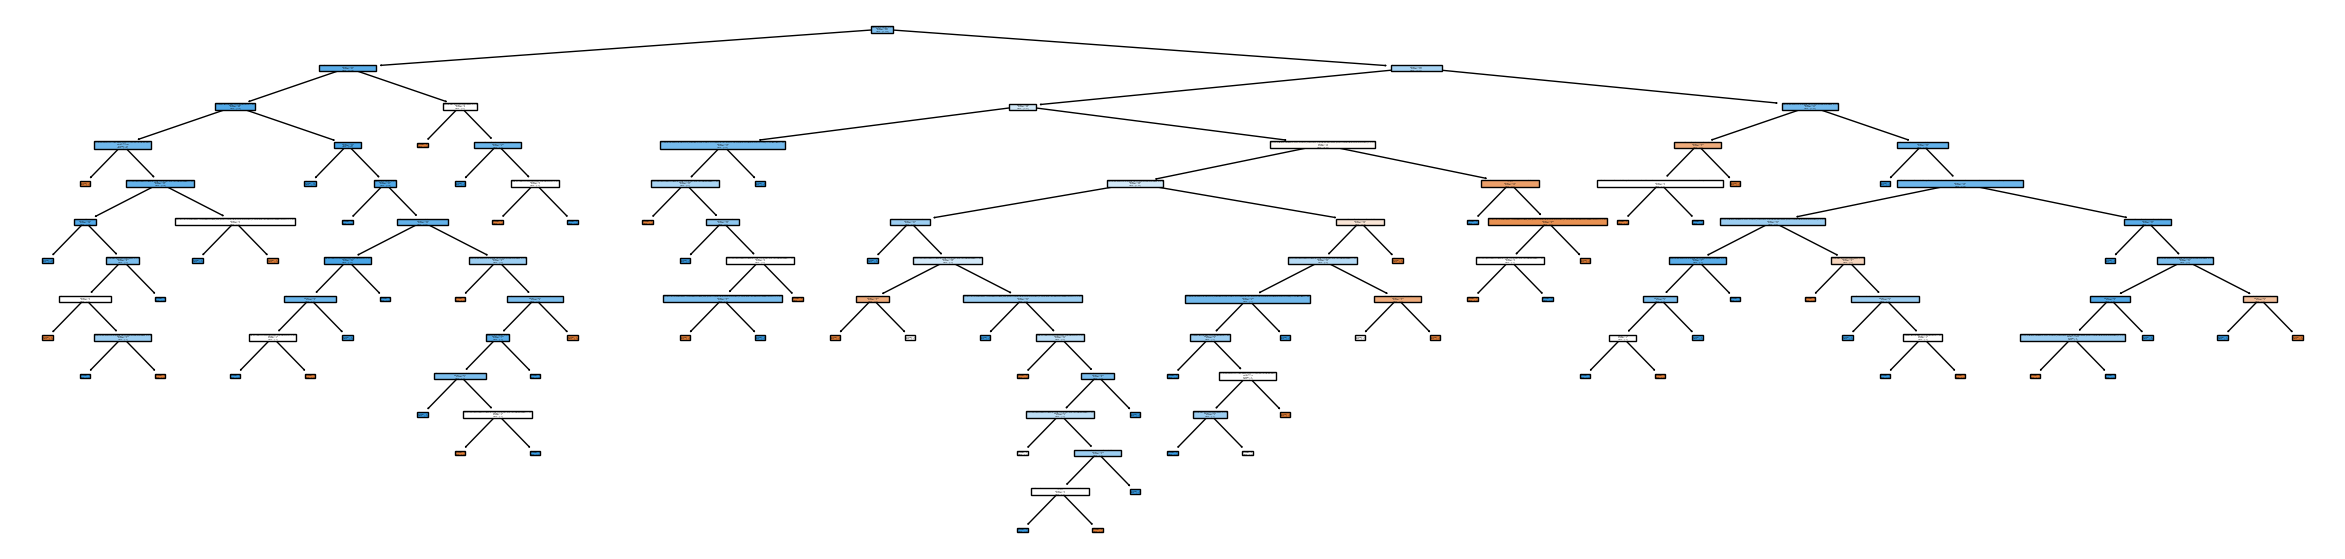

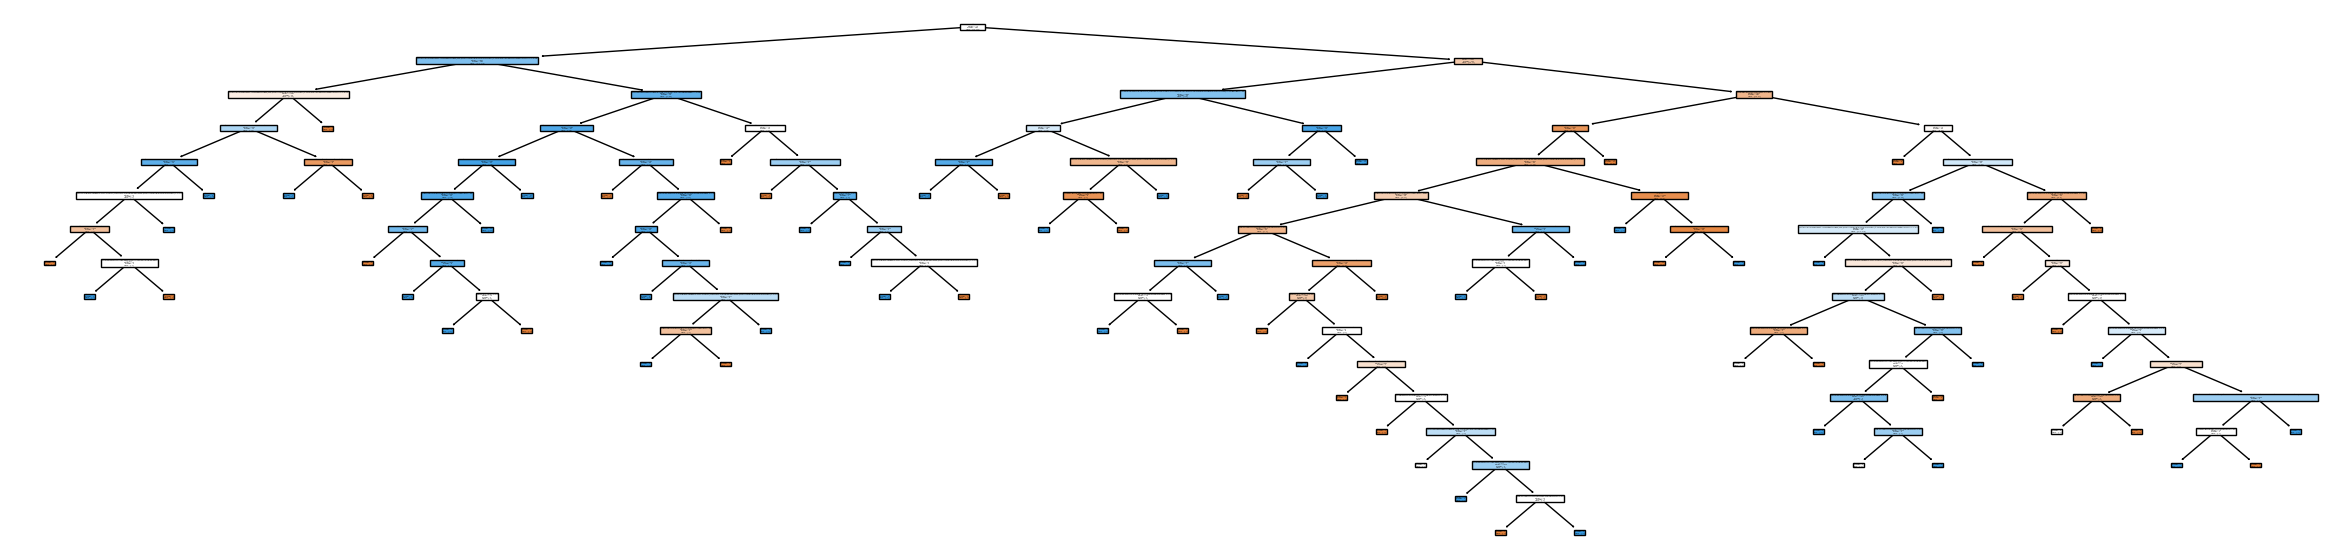

In [33]:
# Mostrando a Árvore GINI
plt.figure(figsize = (30, 7))
print("Árvore de Decisão ENTROPY")
tree.plot_tree(classificador_entropy, feature_names = atributos_pre.columns, filled = True)

# Mostrando a Árvore GINI SMOTE
plt.figure(figsize = (30, 7))
print("Árvore de Decisão ENTROPY SMOTE")
tree.plot_tree(classificador_entropy_smote, feature_names = atributos_pre.columns, filled = True)

### Mostrando as Métricas - Antes do Cross Validation

In [34]:
reporte_de_classificacao_entropy = classification_report(y_teste, previsoes_entropy)
print("Métricas Árvore de Decisão - ENTROPIA: \n", reporte_de_classificacao_entropy)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_entropy_smote = classification_report(y_teste, previsoes_entropy_smote)
print("Métricas Árvore de Decisão com SMOTE - ENTROPIA: \n", reporte_de_classificacao_entropy_smote)

Métricas Árvore de Decisão - ENTROPIA: 
               precision    recall  f1-score   support

           0       0.36      0.45      0.40        11
           1       0.84      0.78      0.81        40

    accuracy                           0.71        51
   macro avg       0.60      0.61      0.60        51
weighted avg       0.73      0.71      0.72        51

-------------------------------------------------------------
Métricas Árvore de Decisão com SMOTE - ENTROPIA: 
               precision    recall  f1-score   support

           0       0.28      0.45      0.34        11
           1       0.82      0.68      0.74        40

    accuracy                           0.63        51
   macro avg       0.55      0.56      0.54        51
weighted avg       0.70      0.63      0.65        51



##### Matriz de Confusão

Matriz de Confusão ENTROPY:  
 [[ 5  6]
 [ 9 31]]


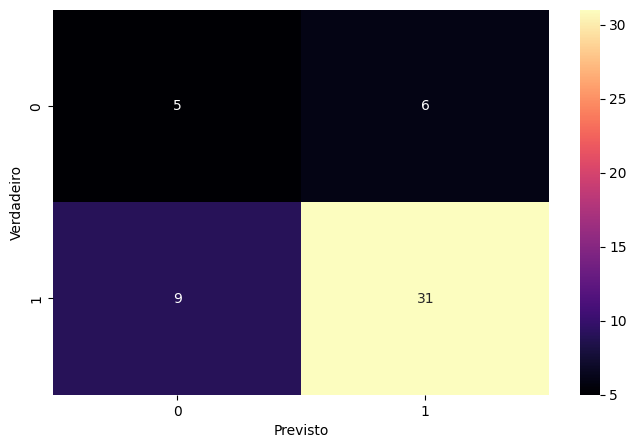

-------------------------------------------------------------------------------------------------------
Matriz de Confusão ENTROPY SMOTE:  
 [[ 5  6]
 [13 27]]


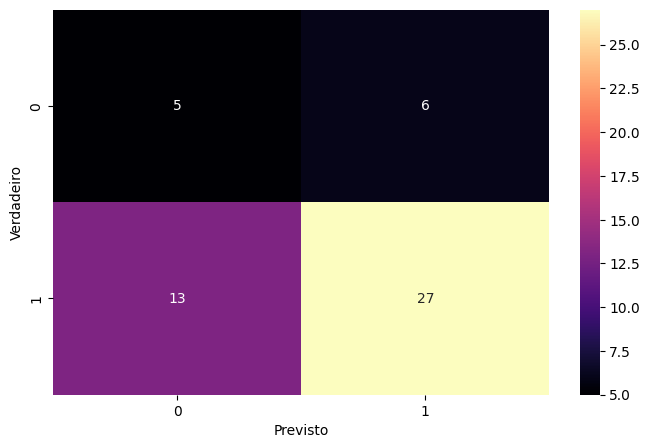

In [35]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_entropy = confusion_matrix(y_teste, previsoes_entropy)
print("Matriz de Confusão ENTROPY: ", "\n", matriz_de_confusao_entropy)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_entropy, annot=True, fmt='d', cmap='magma', xticklabels = classificador_entropy.classes_, yticklabels = classificador_entropy.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

# MATRIZ DE CONFUSÃO GINI - SMOTE
matriz_de_confusao_entropy_smote = confusion_matrix(y_teste, previsoes_entropy_smote)
print("Matriz de Confusão ENTROPY SMOTE: ", "\n", matriz_de_confusao_entropy_smote)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_entropy_smote, annot=True, fmt='d', cmap='magma', xticklabels = classificador_entropy_smote.classes_, yticklabels = classificador_entropy_smote.classes_)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### Cross Validation

- Separando em 5 partes

In [36]:
# Parâmetros
parametros_entropy = {
    'criterion': ['entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}


# Criando classificador com os hyper parameters
classificador_entropy_smote_cross_validation = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = None,
    max_features = None,
    min_samples_leaf = 1,
    min_samples_split = 10,
    splitter = 'random',
    random_state = 42
    )

# Criando objeto GridSearchCV, para o Cross Validation com os hyperparametros
entropy_cross_validantion_grid = GridSearchCV(estimator = classificador_entropy_smote_cross_validation, param_grid = parametros_entropy, scoring = 'f1', cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo com o SMOTE
entropy_cross_validantion_grid.fit(X_treino_smote, y_treino_smote)

# Testando o Modelo
previsoes_entropy_cross_validation = entropy_cross_validantion_grid.predict(X_teste)

print("-"*100)

# Mostrando os melhores hyperparameters
print("Melhores hyperparameters: ", entropy_cross_validantion_grid.best_params_)

# Mostrando as melhor acurácia

entropy_resultados_smote = entropy_cross_validantion_grid.cv_results_
entropy_smote_acuracias_cross_validation = entropy_resultados_smote['mean_test_score']

entropy_melhor_acuracias_smote = sorted(entropy_smote_acuracias_cross_validation, reverse = True)[:5]
print("Melhores acurácias: ", entropy_melhor_acuracias_smote)

entropy_acuracias_media_smote = np.mean(entropy_melhor_acuracias_smote)
print("Média das acurácias ENTROPY: ", entropy_acuracias_media_smote)

print("-"*100)

----------------------------------------------------------------------------------------------------
Melhores hyperparameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Melhores acurácias:  [0.7764961313196608, 0.7764961313196608, 0.7695091575091574, 0.7695091575091574, 0.7686482599942479]
Média das acurácias ENTROPY:  0.7721317675303769
----------------------------------------------------------------------------------------------------


#### Métricas - Cross Validation

In [37]:
# Métricas Bayes com SMOTE
reporte_de_classificacao_entropy_cross_validation = classification_report(y_teste, previsoes_entropy_cross_validation)
print("Métricas Entropia com SMOTE: \n", reporte_de_classificacao_entropy_cross_validation)

Métricas Entropia com SMOTE: 
               precision    recall  f1-score   support

           0       0.24      0.36      0.29        11
           1       0.79      0.68      0.73        40

    accuracy                           0.61        51
   macro avg       0.51      0.52      0.51        51
weighted avg       0.67      0.61      0.63        51



#### Matriz de Confusão

Matriz de Confusão GINI:  
 [[ 4  7]
 [13 27]]


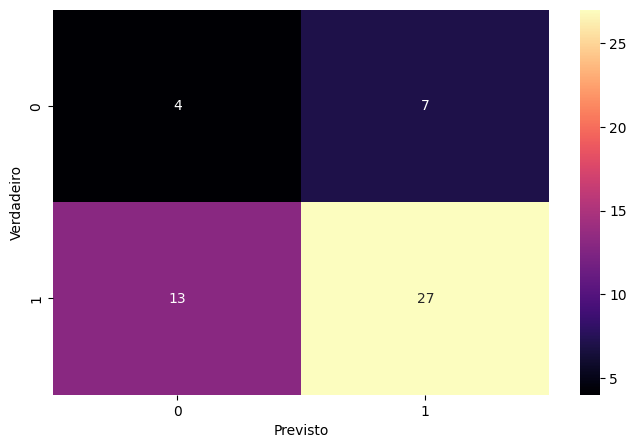

-------------------------------------------------------------------------------------------------------


In [38]:
# MATRIZ DE CONFUSÃO GINI
matriz_de_confusao_entropy_cross_validation = confusion_matrix(y_teste, previsoes_entropy_cross_validation)
print("Matriz de Confusão GINI: ", "\n", matriz_de_confusao_entropy_cross_validation)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_entropy_cross_validation, annot=True, fmt='d', cmap='magma')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

### Conclusção Árvore de Decisão - Entropy

##### Concluindo o Modelo Árvore de Decisão - ENTROPIA, podemos observar que não usando o método SMOTE naturalmente a acurácia foi maior. Mas utilizamos ele dentro do Cross Validation com os hyperparâmetros, tivemos uma acurácia maior com o método SMOTE. Vamos utilizar esse valor da acurácia como referência.

## 🧑‍🤝‍🧑 Modelo KNN 🧑‍🤝‍🧑

### Treinando o Modelo

#### Criando o classificador para ver o melhor k

In [39]:
# Criando um intervalor - 2 a 40

intervalo = range(1, 40)

# Criando uma lista de acurácias para melhor k
acuracias = []
acuracias_smote = []

for k in intervalo:
    # Criando classificador no for
    classificador_knn_melhor_k = KNeighborsClassifier(n_neighbors = k)
    # Criando classificador no for com SMOTE
    classificador_knn_smote_melhor_k = KNeighborsClassifier(n_neighbors = k)

    # Treinando o Modelo
    classificador_knn_melhor_k.fit(X_treino, y_treino)
    # Treinando o Modelo com SMOTE
    classificador_knn_smote_melhor_k.fit(X_treino_smote, y_treino_smote)

    # Testando o Modelo
    previsoes_knn_melhor_k = classificador_knn_melhor_k.predict(X_teste)
    # Testando o Modelo com SMOTE
    previsoes_knn_smote_melhor_k = classificador_knn_smote_melhor_k.predict(X_teste)

    # Adicionando as acurácias na lista
    acuracias.append(accuracy_score(previsoes_knn_melhor_k, y_teste))
    acuracias_smote.append(accuracy_score(previsoes_knn_smote_melhor_k, y_teste))

# Encontrando melhor k
melhor_k = intervalo[acuracias.index(max(acuracias))]
melhor_k_smote = intervalo[acuracias_smote.index(max(acuracias_smote))]

# Mostrando os melhores k
print(f"Melhor k: {melhor_k}")
print(f"Melhor k com SMOTE: {melhor_k_smote}")

Melhor k: 6
Melhor k com SMOTE: 1


##### Criando os classificadores com os melhores k

In [40]:
# Criando classificador
classificador_knn = KNeighborsClassifier(n_neighbors = melhor_k)

# Criando classificador com SMOTE
classificador_knn_smote = KNeighborsClassifier(n_neighbors = melhor_k_smote)

# Treinando o modelo
classificador_knn.fit(X_treino, y_treino)

# Treinando o modelo SMOTE
classificador_knn_smote.fit(X_treino_smote, y_treino_smote)

KNeighborsClassifier(n_neighbors=1)

##### Prevendo o Modelo - Com o conjunto de teste

In [41]:
# Prevendo o Modelo
previsoes_knn = classificador_knn.predict(X_teste)
#display(previsoes_bayes)

# Prevendo o Modelo com o SMOTE
previsoes_knn_smote = classificador_knn_smote.predict(X_teste)

### Mostrando as Métricas - Antes do Cross Validation

In [42]:
nome_das_classes_knn = [str(classe) for classe in label_encoder.classes_]

reporte_de_classificacao_knn = classification_report(y_teste, previsoes_knn, target_names= nome_das_classes_knn)
print("Métricas KNN: \n", reporte_de_classificacao_knn)

print("-------------------------------------------------------------")

# Métricas Bayes com SMOTE
reporte_de_classificacao_knn_smote = classification_report(y_teste, previsoes_knn_smote, target_names = nome_das_classes_knn)
print("Métricas KNN com SMOTE: \n", reporte_de_classificacao_knn_smote)

Métricas KNN: 
                      precision    recall  f1-score   support

         Estudantil       0.75      0.27      0.40        11
Não tenho motivação       0.83      0.97      0.90        40

           accuracy                           0.82        51
          macro avg       0.79      0.62      0.65        51
       weighted avg       0.81      0.82      0.79        51

-------------------------------------------------------------
Métricas KNN com SMOTE: 
                      precision    recall  f1-score   support

         Estudantil       0.31      0.36      0.33        11
Não tenho motivação       0.82      0.78      0.79        40

           accuracy                           0.69        51
          macro avg       0.56      0.57      0.56        51
       weighted avg       0.71      0.69      0.70        51



#### Matriz de confusão

Matriz de Confusão - KNN:  
 [[ 3  8]
 [ 1 39]]


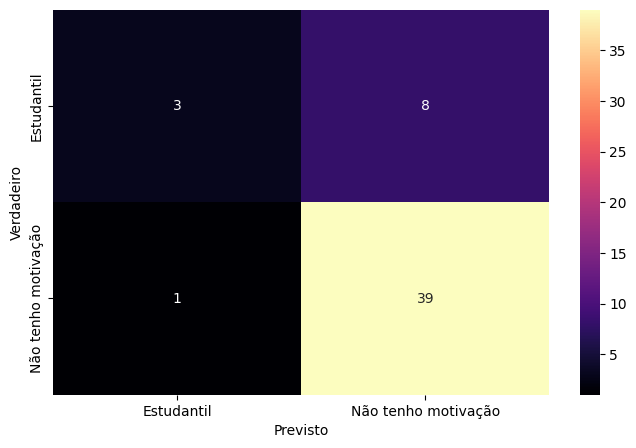

-------------------------------------------------------------------------------------------------------
Matriz de Confusão com SMOTE - KNN:  
 [[ 4  7]
 [ 9 31]]


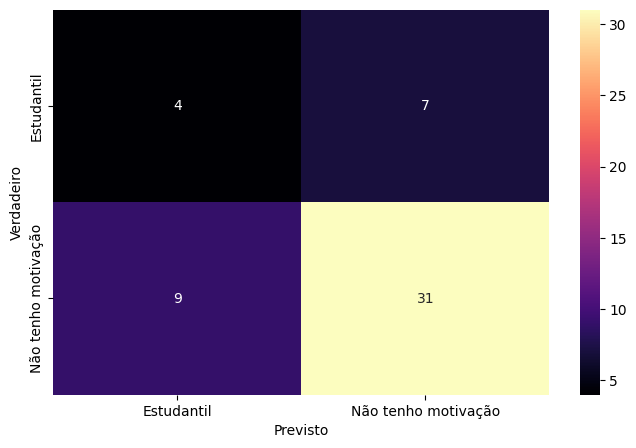

In [43]:
# MATRIZ DE CONFUSÃO KNN
matriz_de_confusao_knn = confusion_matrix(y_teste, previsoes_knn)
print("Matriz de Confusão - KNN: ", "\n", matriz_de_confusao_knn)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_knn, annot=True, fmt='d', cmap='magma', xticklabels = nome_das_classes_knn, yticklabels = nome_das_classes_knn)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

# MATRIZ DE CONFUSÃO KNN
matriz_de_confusao_knn_smote = confusion_matrix(y_teste, previsoes_knn_smote)
print("Matriz de Confusão com SMOTE - KNN: ", "\n", matriz_de_confusao_knn_smote)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_knn_smote, annot=True, fmt='d', cmap='magma', xticklabels = nome_das_classes_knn, yticklabels = nome_das_classes_knn)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

### Cross Validation

In [44]:
# Criando classificador
classificador_knn_cross_validation = KNeighborsClassifier()

# Parâmetros para o Cross Validation
parametros = {'n_neighbors': range(1, 40),
              'metric': ["euclidean"]}

# Usando o GridSearchCV
classificador_knn_cross_validation_grid = GridSearchCV(estimator = classificador_knn_cross_validation, param_grid = parametros, scoring = "f1", cv = KFold(n_splits = 5, random_state = 42, shuffle = True))

# Treinando o Modelo
classificador_knn_cross_validation_grid.fit(X_treino_smote, y_treino_smote)

print(classificador_knn_cross_validation_grid.best_params_)

# Testando o Modelo
previsoes_knn_cross_validation_grid = classificador_knn_cross_validation_grid.predict(X_teste)

{'metric': 'euclidean', 'n_neighbors': 1}


#### Mostrando as métricas

In [45]:
reporte_de_classificacao_knn_cross_validation_grid = classification_report(y_teste, previsoes_knn_cross_validation_grid)
print("Métricas KNN: ")
print(reporte_de_classificacao_knn_cross_validation_grid)

Métricas KNN: 
              precision    recall  f1-score   support

           0       0.31      0.36      0.33        11
           1       0.82      0.78      0.79        40

    accuracy                           0.69        51
   macro avg       0.56      0.57      0.56        51
weighted avg       0.71      0.69      0.70        51



#### Matriz de Confusão

Matriz de Confusão KNN:  
 [[ 4  7]
 [ 9 31]]


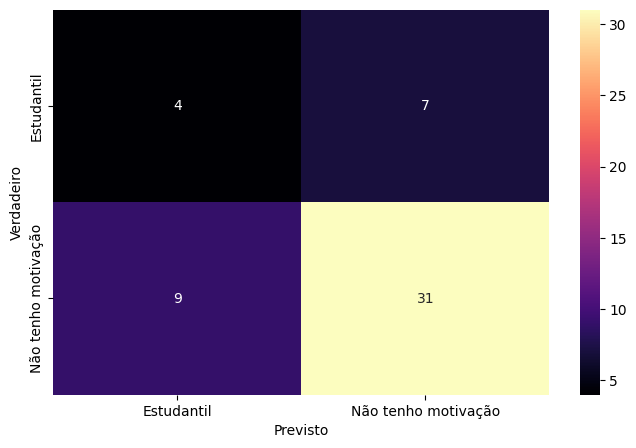

-------------------------------------------------------------------------------------------------------


In [46]:
# MATRIZ DE CONFUSÃO KNN
matriz_de_confusao_knn_cross_validation = confusion_matrix(y_teste, previsoes_knn_cross_validation_grid)
print("Matriz de Confusão KNN: ", "\n", matriz_de_confusao_knn_cross_validation)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_de_confusao_knn_cross_validation, annot=True, fmt='d', cmap='magma', xticklabels = nome_das_classes_knn, yticklabels = nome_das_classes_knn)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

print("-"*103)

### Conclusão KNN

##### Concluindo o modelo KNN, analisamos que não usando o método SMOTE tivemos uma acurácia muito boa, mas quando colocamos ele dentro do Cross Validation com os hyperparâmetros, tivemos que usar com o método SMOTE. Vamos utilizar essa acurácia como referência para esse modelo.